In [2]:
#Import rquired libaries 
import pandas as pd 
import os as os
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# Filepath
path = "./Sales_Data"
# Create a list of csv files names
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
# Create an empty dataframe
sales_data = pd.DataFrame()
# Create a merged dataframe for all sales tables
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    sales_data = pd.concat([sales_data, current_data])
    
sales_data.to_csv("all_data_copy.csv", index=False)

# Filepath
path = "./Sales_Data"
# Create a list of csv files names
files = [file for file in os.listdir(path)]
# Create an empty dataframe
data = pd.DataFrame()
# Create a merged dataframe for all sales tables
for csv in files:
    dataframe = pd.read_csv(os.path.join(path, csv))
    print(f"{csv} merged")
    data = pd.concat([data, dataframe])

Sales_April_2019.csv merged
Sales_August_2019.csv merged
Sales_December_2019.csv merged
Sales_February_2019.csv merged
Sales_January_2019.csv merged
Sales_July_2019.csv merged
Sales_June_2019.csv merged
Sales_March_2019.csv merged
Sales_May_2019.csv merged
Sales_November_2019.csv merged
Sales_October_2019.csv merged
Sales_September_2019.csv merged


In [4]:
sales_data.shape

(186850, 6)

Apperantly here we have full null rows 11686 - 11646 = 40 null rows 

In [5]:
#view the null rows before droping them
rows_with_null_values = sales_data[sales_data.isnull().any(axis=1)]
rows_with_null_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#drop null rows
df= sales_data.dropna(how='all')

In [7]:
#check from the df shape that all the null values where dropped down
df.shape

(186305, 6)

Now we have Fine data Set with no null values to work with as a first step in the Analysis

In [8]:
#view the dataset to define the next step
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


Now for me to start Analyzing the sales I need to manpiute the Order Date format to make it easier for me to pick month or year

In [9]:
#let's first check if all values in Order Date Column are Valid dates
df["Order Date"].value_counts()

Order Date
Order Date        355
12/15/19 20:16      8
10/30/19 21:28      7
12/11/19 13:24      7
04/02/19 13:24      7
                 ... 
01/18/19 18:04      1
01/07/19 19:48      1
01/23/19 17:59      1
01/26/19 10:28      1
09/30/19 00:18      1
Name: count, Length: 142396, dtype: int64

As You Can see there are Values Which Contain a String "Order Date" which will make the pd_datetime function cause an error so at first we need to get rid of the those values

In [186]:
#Getrid of String Values
df= df[df["Order Date"] != "Order Date"]
# Convert the "Order Date" column to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%m/%d/%y %H:%M')
#Add year Column
df["Year"]= df["Order Date"].dt.strftime("%Y")
#Add month Column
df["Month"]= df["Order Date"].dt.strftime("%B")
#Add Quarter Column 
df['Quarter']=df['Order Date'].dt.to_period('Q').dt.strftime("%Y-Q%q")
#Add day column to Find if there is amybe a rush hour in buying
df['Day']= df['Order Date'].dt.strftime("%d")
#Add Hour column to Find if there is amybe a rush hour in buying
df['Hour']= df['Order Date'].dt.strftime("%H")

In [187]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Quarter,Hour,Sales,City,Count,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019-Q2,08,23.90,Dallas (TX),1,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019-Q2,22,99.99,Boston (MA),1,07
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,600.00,Los Angeles (CA),1,12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,11.99,Los Angeles (CA),1,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019-Q2,09,11.99,Los Angeles (CA),1,30


Let's Find Out Our Total Sales For 2019

In [156]:
#total sales sum
total_Sales=df.Sales.sum()
total_Sales

34492035.97

Let's Find Out Highest Sales By Quarter From Total Sales

In [169]:
#quarter sales sum
Quarter_Total_Sales = (df.groupby("Quarter")["Sales"].sum()) / total_Sales
Quarter_Total_Sales

Quarter
2019-Q1    0.197805
2019-Q2    0.264440
2019-Q3    0.202650
2019-Q4    0.334853
2020-Q1    0.000251
Name: Sales, dtype: float64

Let's Find Out Highest Sales By Month percentage from Total Sales 

In [170]:
# sales sum by month
Month_Total_Sales = (df.groupby("Month")["Sales"].sum()) / total_Sales
Month_Total_Sales

Month
April        0.098303
August       0.065072
December     0.133754
February     0.063841
January      0.052831
July         0.076765
June         0.074736
March        0.081384
May          0.091401
November     0.092764
October      0.108336
September    0.060813
Name: Sales, dtype: float64

Let's see If we Have a rush Hour in this shop so we may add more salesmen at this time

C:\Users\CompuMax\AppData\Local\Temp\ipykernel_17288\612236464.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Hour"].value_counts().index, y=df["Hour"].value_counts(), palette=custom_palette)


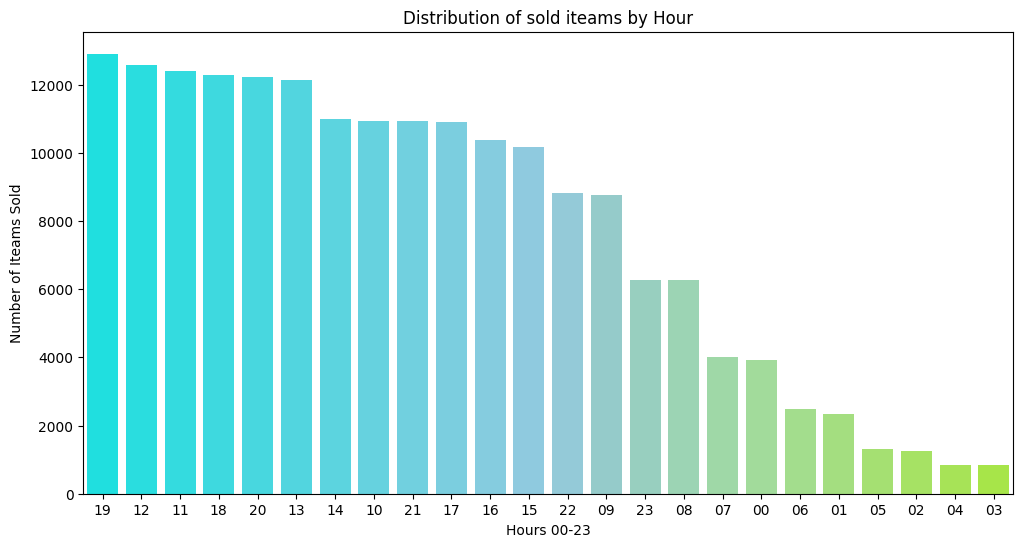

In [157]:
#Colors For Vizulization
cyan = "#00FFFF"
sky_blue = "#87CEEB"
lemon_green = "#ADFF2F"

base_colors = [cyan, sky_blue, lemon_green]

# Create a custom palette by blending the base colors
custom_palette = sns.blend_palette(base_colors, n_colors=24, input="hex")

# Plot using the custom palette
plt.figure(figsize=(12,6))
sns.barplot(x=df["Hour"].value_counts().index, y=df["Hour"].value_counts(), palette=custom_palette)
plt.xlabel('Hours 00-23')
plt.ylabel('Number of Iteams Sold')
plt.title('Distribution of sold iteams by Hour')
plt.show()



Conclusions No need for that We have some good sales in the Morining and Others at night sounds like a normal traffic for me we may even close the shop from 12 am to 7 am and save running costs while this may affect the sales on the other hours in a positive way. This Theory should be tested let's place it in a graph for our presentation with StakeHolders.

In [13]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

In [ ]:
#grouping sales by month
monthly_sales = df.groupby(['Month']).agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

In [158]:
def barplot_plotter(dataframe,x,y,**kwargs):
    # Define the base colors: 
    base_colors = [cyan, sky_blue, lemon_green]
    number_of_colors = len (df[x].value_counts().index)
    # Create a custom palette by blending the base colors
    custom_palette = sns.blend_palette(base_colors, n_colors=number_of_colors, input="hex")
    plt.figure(figsize=(12,6))
    sns.barplot(data=dataframe, x=x, y=y,  hue=x, palette=custom_palette )
    plt.title(f"Total Sales By {x} ")
    plt.xlabel(f"{x}")
    plt.xticks(**kwargs)
    plt.ylabel(f"Total {y}")

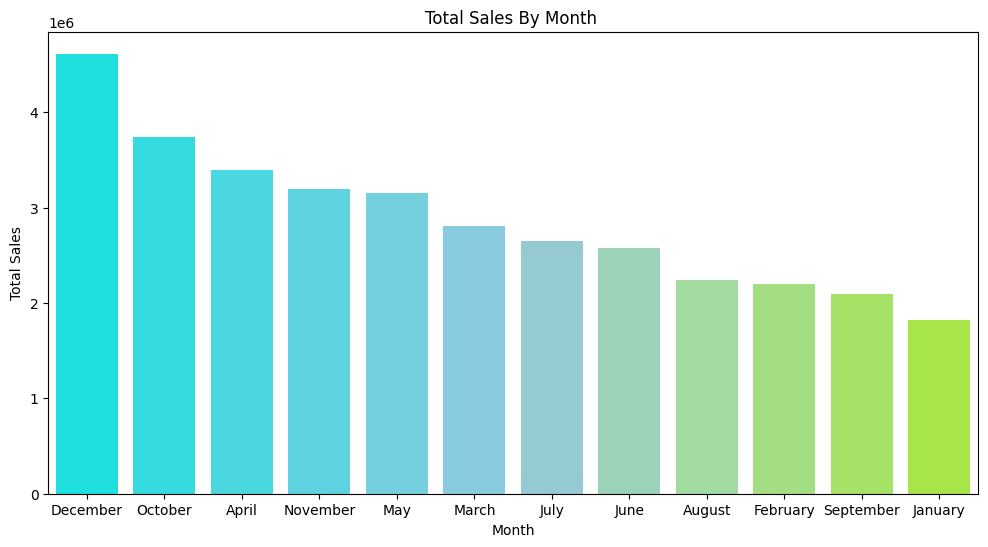

In [159]:
barplot_plotter(monthly_sales,"Month","Sales")

December seems to be the highest selling month as we can spot from the graph

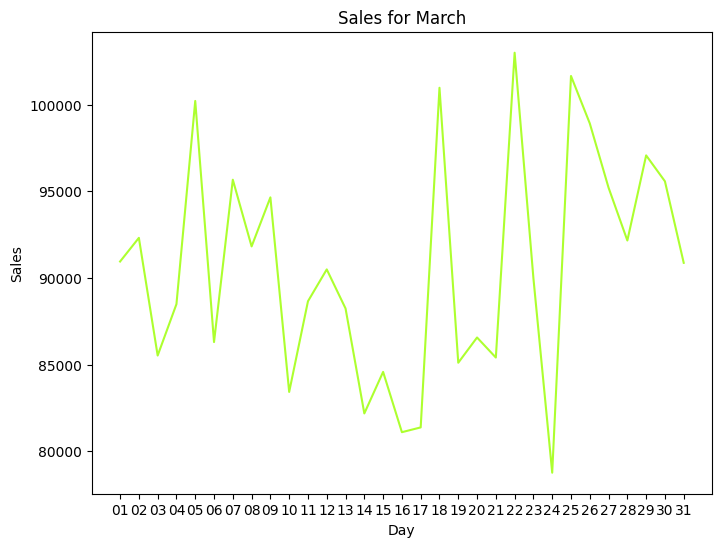

In [208]:
#Define a function to plot each month sales
def month_plotter(monthname,color):
    monthdata = df[df["Month"] == monthname]
    monthdata = pd.DataFrame(monthdata.groupby("Day")["Sales"].sum()).reset_index()
    plt.figure(figsize=(8,6))
    sns.lineplot(data=monthdata, x="Day", y="Sales", color=color)
    plt.title(f"Sales for {monthname}")
#I will plot the sales of the tiop month for each quarter to see If we have any patteren 
month_plotter("March",lemon_green)


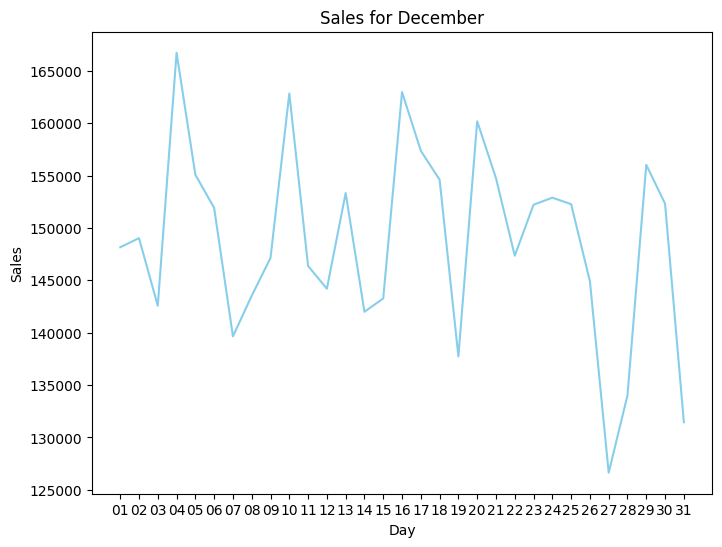

In [209]:
month_plotter("December",sky_blue)

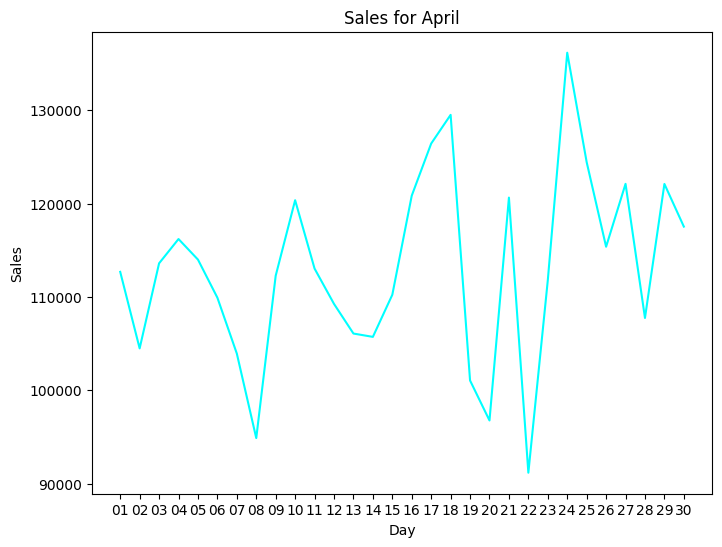

In [210]:
month_plotter("April",cyan)

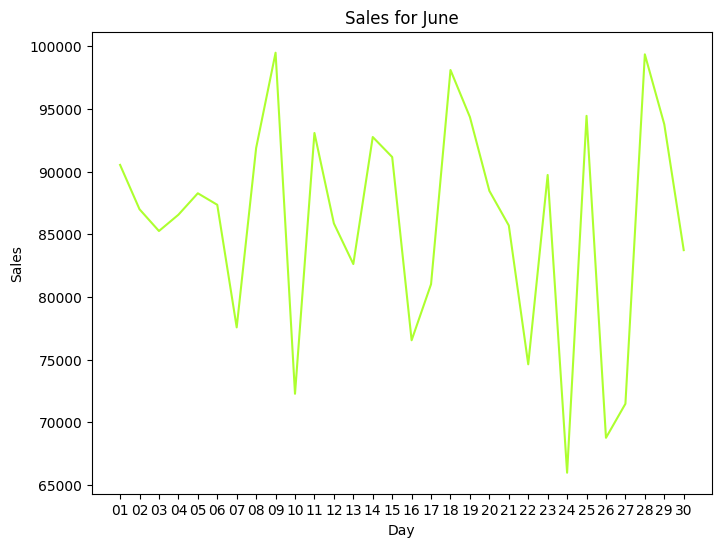

In [211]:
month_plotter("June", lemon_green)

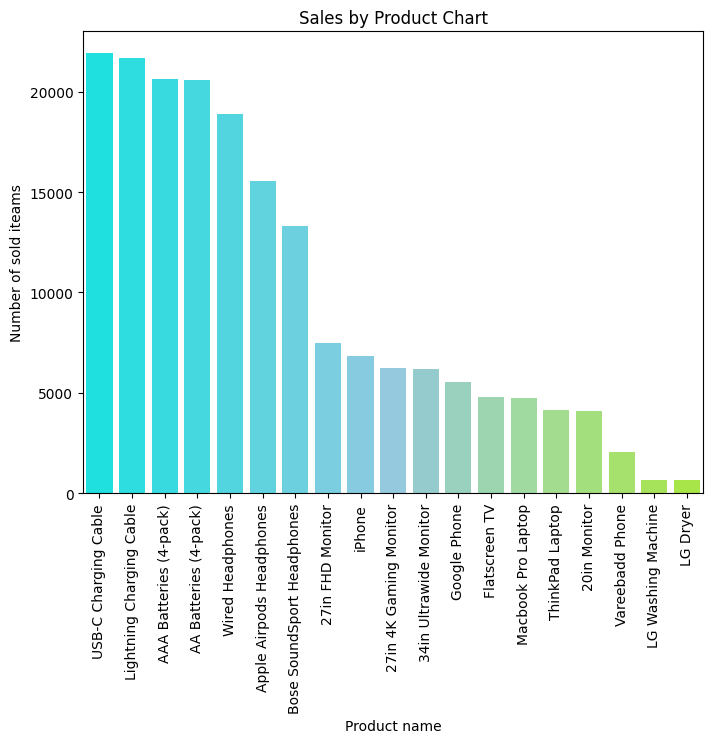

In [160]:
#let's find out wich products are salling the most
# Define the base colors: 
base_colors = [cyan, sky_blue, lemon_green]  
number_of_colors = len (df["Product"].value_counts().index)
# Create a custom palette by blending the base colors
custom_palette_products = sns.blend_palette(base_colors, n_colors=number_of_colors, input="hex")
plt.figure(figsize=(8,6))
sns.barplot(x=df["Product"].value_counts().index, y=df["Product"].value_counts(), palette=custom_palette_products, hue=df["Product"].value_counts().index, legend=False)
plt.title("Sales by Product Chart")
plt.xlabel("Product name")
plt.xticks(rotation=90)
plt.ylabel("Number of sold iteams")
plt.show()

It's Obvuios here that most sold iteams are accessories but does this mean that the most revenue sales comes from it let's plot the sales revenue by product and see

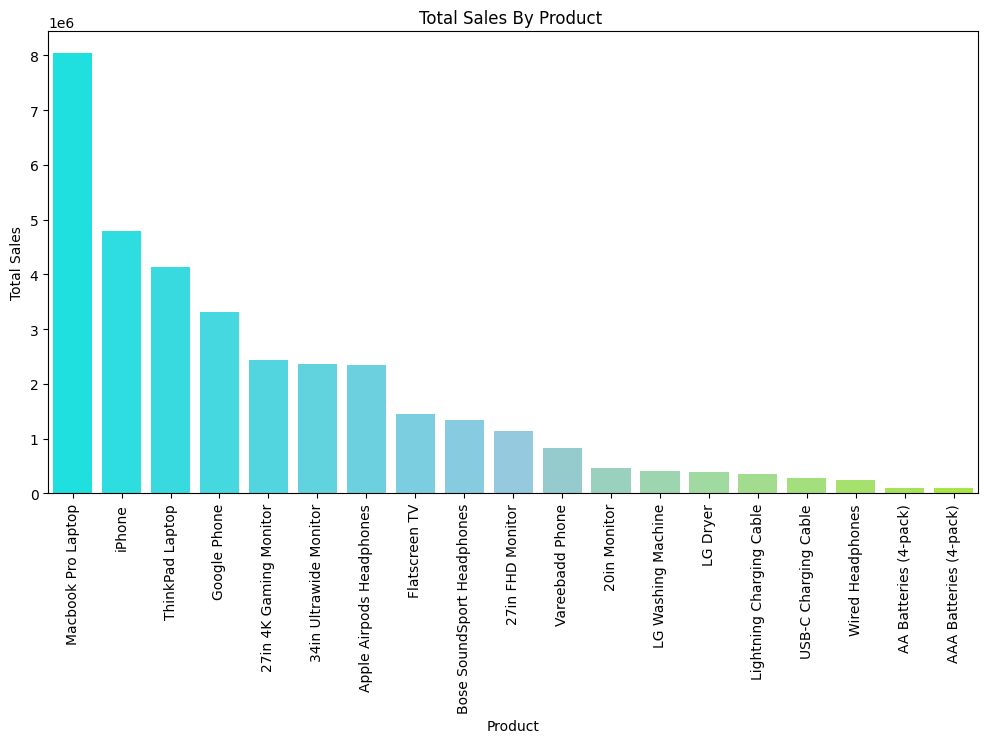

In [161]:
#let's figure out sales revenue by product
sales_by_product = df.groupby("Product").agg({"Sales":"sum"}).sort_values(by = "Sales", ascending =False)
barplot_plotter(sales_by_product,"Product","Sales",rotation=90)


In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Quarter,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019-Q2,08,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019-Q2,22,99.99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019-Q2,09,11.99


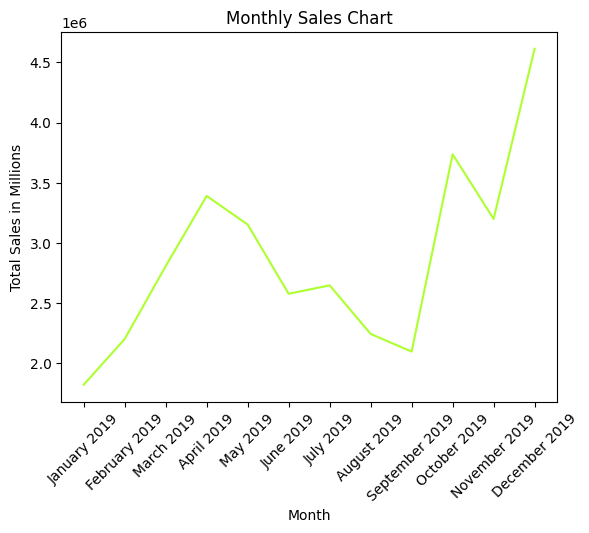

In [163]:
#Take a look at our Monthly Total Sales
df_sales = df.groupby("Month").agg({"Sales":"sum"}).reset_index()
# Adding a day and year to each month
df_sales['Month'] = df_sales['Month'] + ' 2019'

# Converting the "Month" column to datetime format
df_sales['Month as date'] = pd.to_datetime(df_sales['Month'], format='%B %Y')
# Sorting DataFrame by month
df_sales = df_sales.sort_values(by='Month as date')
sns.lineplot(data=df_sales,x='Month',y=df_sales["Sales"].round(),color=lemon_green)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Sales in Millions')
plt.title('Monthly Sales Chart')
plt.show()


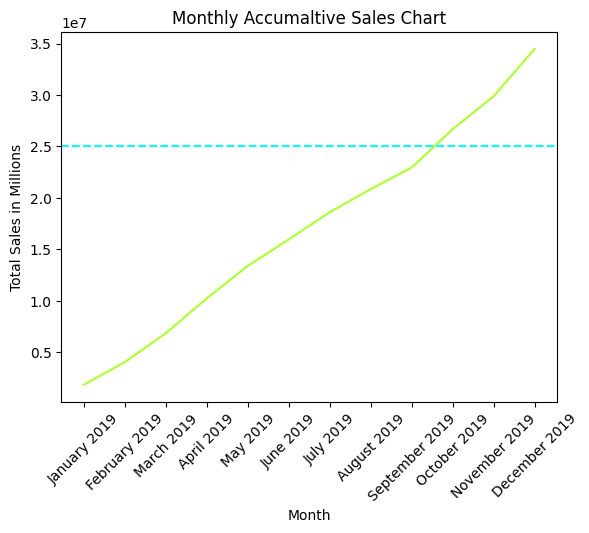

In [164]:
#Assuming we have a breakpoint where we exceed our target sales which is 25 millions let's find it out
df_sales["acc_sales"] = df_sales["Sales"].cumsum()
sns.lineplot(data=df_sales,x='Month',y=df_sales["acc_sales"].round(),color=lemon_green)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Total Sales in Millions')
plt.title('Monthly Accumaltive Sales Chart')
plt.axhline(y=25000000, color=cyan, linestyle='--')
plt.show()

As we can spot from the graph we reached the Breakpoint by the End of Novamber but sales also still do increase for the upcoming 3 months so IF we plan on making discounts we can estimate from our two gr4aphs that the best time to do this to have a positive Impact in sales should be by mid January  to the beggining of March

In [86]:
#let's check the sales by city
#city getter function
def get_city(address):
    return address.split(",")[1].strip(" ")
#state getter function
def get_state(address):
    return address.split(",")[2].split(" ")[1]
#apply the functions to the dataframe
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Quarter,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019-Q2,08,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019-Q2,22,99.99,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019-Q2,09,11.99,Los Angeles (CA)


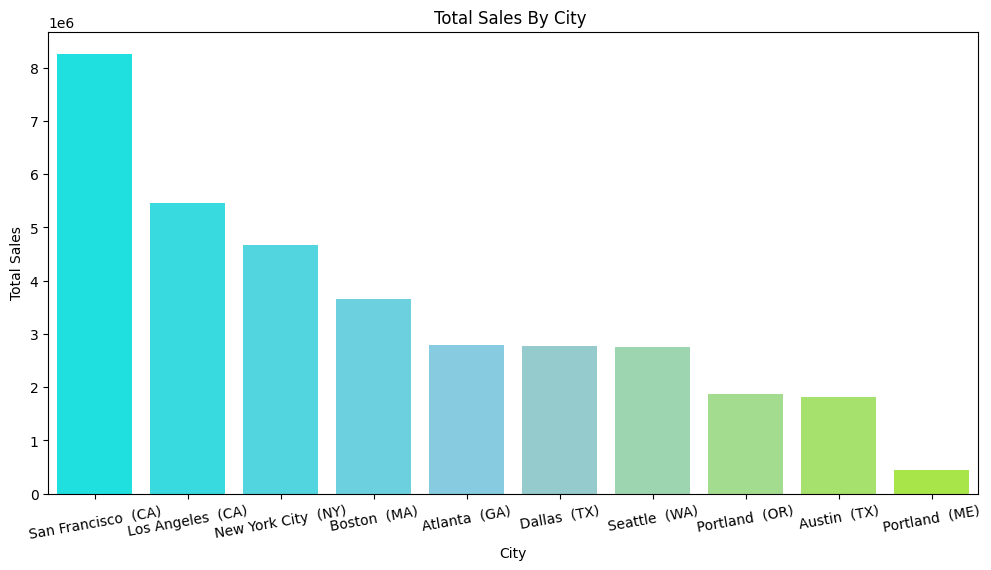

In [165]:
# I prefer amking a new datframe for sales by city to have more control over it will plotting
sales_city = pd.DataFrame(df.groupby("City")["Sales"].sum()).reset_index().sort_values(by="Sales", ascending = False)
#let's view top 10 selling city
barplot_plotter(sales_city.head(10),"City","Sales",rotation=10)

Text(0.5, 1.0, 'Hourly Sales Traffic')

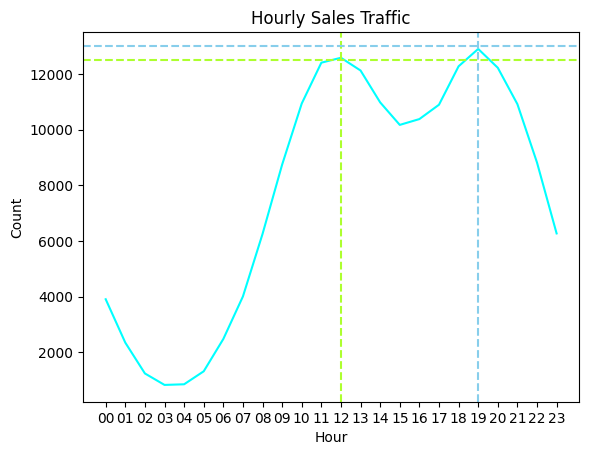

In [167]:
#which time in the day has the most traffic and we should Advertise in it if the shop is at a mall or somthing
df['Count'] = 1
df_sorted_by_hour=pd.DataFrame(df.groupby("Hour")["Count"].sum()).sort_values(by="Hour").reset_index()

sns.lineplot(x=df_sorted_by_hour["Hour"], y=df_sorted_by_hour["Count"],color=cyan)
plt.axvline(x=12, color=lemon_green, linestyle='--')
plt.axvline(x=19, color=sky_blue, linestyle='--')
plt.axhline(y=13000, color=sky_blue, linestyle='--')
plt.axhline(y=12500, color=lemon_green, linestyle='--')
plt.title("Hourly Sales Traffic")
# My recommendation is slightly before 12am or 7pm

In [133]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Quarter,Hour,Sales,City,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019-Q2,08,23.90,Dallas (TX),1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019-Q2,22,99.99,Boston (MA),1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,600.00,Los Angeles (CA),1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019-Q2,14,11.99,Los Angeles (CA),1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019-Q2,09,11.99,Los Angeles (CA),1


Text(0.5, 1.0, 'Sales By Quarter')

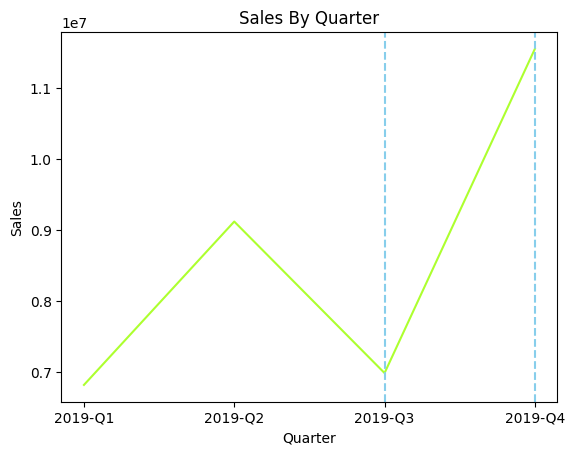

In [168]:
#group sales by Quarter
df_sorted_by_Quarter=pd.DataFrame(df.groupby(["Quarter","Year"])["Sales"].sum()).sort_values(by="Quarter").reset_index()
#group sales  y year 2019 to not have a false drop in sales by 2020 because we don't have data for 2020
df_sorted_by_Quarter_2019=df_sorted_by_Quarter[df_sorted_by_Quarter["Year"]=="2019"]
#plot the Date
sns.lineplot(x=df_sorted_by_Quarter_2019["Quarter"], y=df_sorted_by_Quarter["Sales"],color=lemon_green)
plt.axvline(x="2019-Q3", color=sky_blue, linestyle='--')
plt.axvline(x="2019-Q4", color=sky_blue, linestyle='--')
plt.title("Sales By Quarter")
# Quarter 4 is our Golden era so we should have more marketing campains in the other quarters and also check why specificlly this era sales more 
